In [21]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [22]:
import numpy as np
import pandas as pd

In [23]:
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [26]:
engine

Engine(sqlite:///hawaii.sqlite)

In [27]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [28]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [31]:
def get_average_for_months(df, year, column = 'temps'):
    out = {}
    for month in range(1,13):
        month = '0' + str(month) if month < 10 else str(month)
        #print(f'date.str.contains("{year}-{month}")')
        data = df.query(f'date.str.contains("{year}-{month}")', engine='python')
        if not data.empty:
            out[month] = data[column].mean()
        else:
            out[month] = 0
    return out
    
def get_year_df(year):
    temps = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).filter(extract('year', Measurement.date)==year).all()
    df = pd.DataFrame(temps, columns=['date','temps', 'precipitation'])
    df.set_index(df['date'], inplace=True)
    # Sort the dataframe by date
    df = df.sort_index()
    return df

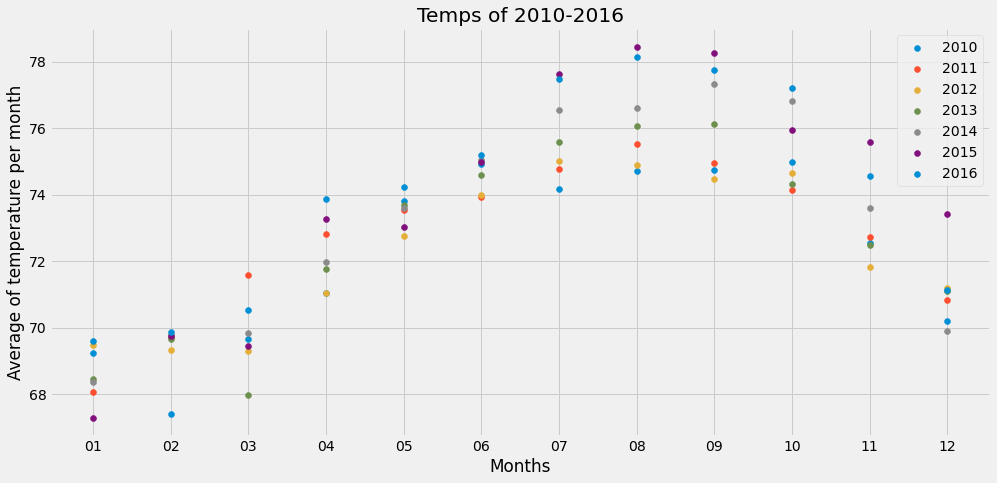

In [35]:
plt.figure(figsize=(15, 7))
for year in range(2010,2017):
    df_temp = get_year_df(year)
    dict_temp = get_average_for_months(df_temp, year)
    plt.scatter(dict_temp.keys(), dict_temp.values(), label = str(year))

plt.legend()
plt.title('Temps of 2010-2016')
plt.xlabel('Months')
plt.ylabel('Average of temperature per month')
plt.show()



In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge